In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this exercise, we make a simple inference procedure. We seek to estimate the distribution of the mean of rainfall (in millimeters) for the states in the center-north region in Mexico, from 2005 to 2021. Our main question of interest is:
¿Which state in the center-north region of Mexico is the driest?

The center-north region in Mexico is defined[^1] as :
+ Aguascalientes
+ Guanajuato
+ Querétaro
+ San Luis Potosí
+ Zacatecas 

[^1]: https://es.wikipedia.org/wiki/Anexo:Zonas_econ%C3%B3micas_de_M%C3%A9xico

### Loading and reducing the dataset

In [2]:
# location in PC of dataset
xlsx_location = r'C:\Users\luis9\OneDrive\Datos\Precipitación media histórica por entidad federativa 2005 a 20021 en milimetros.xlsx'
# read .xlsx as pd.DataFrame
df_0 = pd.read_excel(xlsx_location)  
# print first 5 rows:
df_0.head()

,Entidad,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aguascalientes,448,456,459,460,464,463,464,461,461,465,466,471,472,473,477,477,477,480
1,Baja California,203,204,202,202,202,201,202,202,201,201,200,200,201,200,199,199,198,196
2,Baja California Sur,176,176,178,178,178,179,178,176,178,179,181,183,184,183,183,184,183,183
3,Campeche,1138,1169,1175,1175,1182,1182,1185,1185,1184,1191,1194,1196,1196,1198,1201,1202,1209,1209
4,Coahuila,316,327,327,327,332,332,335,333,333,334,336,338,341,341,342,341,340,338


In [3]:
# Get states of interest into array
center_north = ['Aguascalientes', 'Guanajuato', 'Querétaro', 'San Luis Potosí', 'Zacatecas']

# Save pd.DataFrame
df = df_0[(df_0.Entidad).isin(center_north)]
# Print whole dataset
df

,Entidad,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aguascalientes,448,456,459,460,464,463,464,461,461,465,466,471,472,473,477,477,477,480
10,Guanajuato,592,605,608,608,613,613,615,612,612,614,614,617,618,618,621,620,619,621
21,Querétaro,555,558,559,559,561,560,562,560,560,563,566,568,571,571,571,569,567,568
23,San Luis Potosí,960,946,942,942,953,953,959,958,958,957,955,953,950,945,941,936,929,926
31,Zacatecas,516,518,517,517,516,516,513,516,512,514,514,517,516,516,517,516,514,515


In [4]:
# Simplify df to contain values of interest in an appropiate format
df.index = df.Entidad
df = df[df.columns[2:]]
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entidad,,,,,,,,,,,,,,,,,
Aguascalientes,456,459,460,464,463,464,461,461,465,466,471,472,473,477,477,477,480
Guanajuato,605,608,608,613,613,615,612,612,614,614,617,618,618,621,620,619,621
Querétaro,558,559,559,561,560,562,560,560,563,566,568,571,571,571,569,567,568
San Luis Potosí,946,942,942,953,953,959,958,958,957,955,953,950,945,941,936,929,926
Zacatecas,518,517,517,516,516,513,516,512,514,514,517,516,516,517,516,514,515


In [5]:
# get all values into np.array
data_array = df.values.flatten()

### Estimation

#### Histogram (As continuous)

Text(0, 0.5, 'Count')

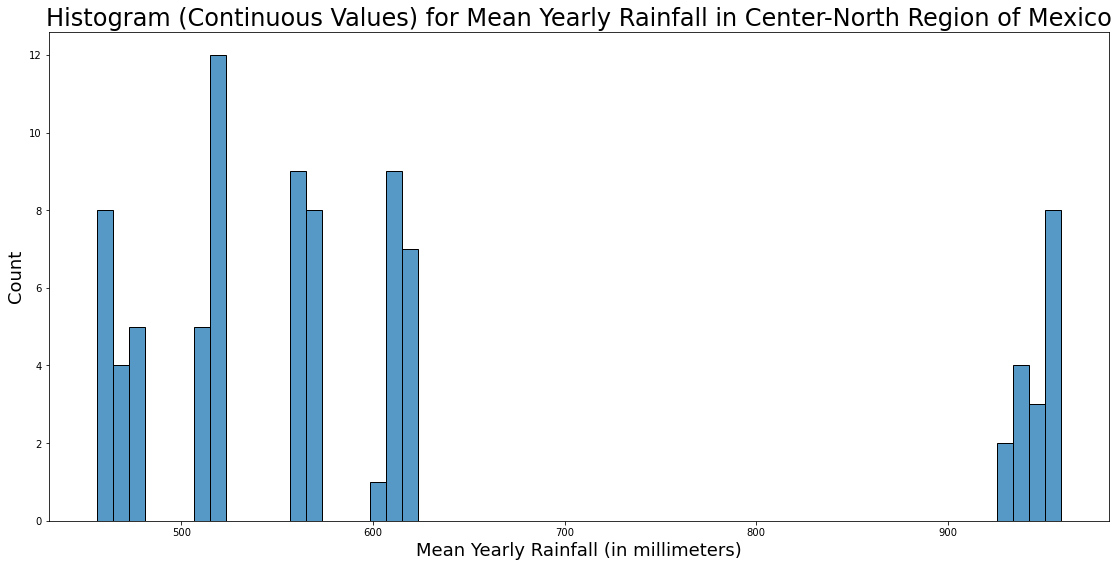

In [6]:
fig, ax = plt.subplots(figsize=(19,9))

sns.histplot(data_array, bins=60)
plt.title('Histogram (Continuous Values) for Mean Yearly Rainfall in Center-North Region of Mexico', fontsize=24)
plt.xlabel('Mean Yearly Rainfall (in millimeters)', fontsize=18)
plt.ylabel('Count', fontsize=18)

<AxesSubplot:title={'center':'Histogram (Continuous Values) for Mean Yearly Rainfall in Center-North Region of Mexico'}, xlabel='Mean Yearly Rainfall (in millimeters)', ylabel='Count'>

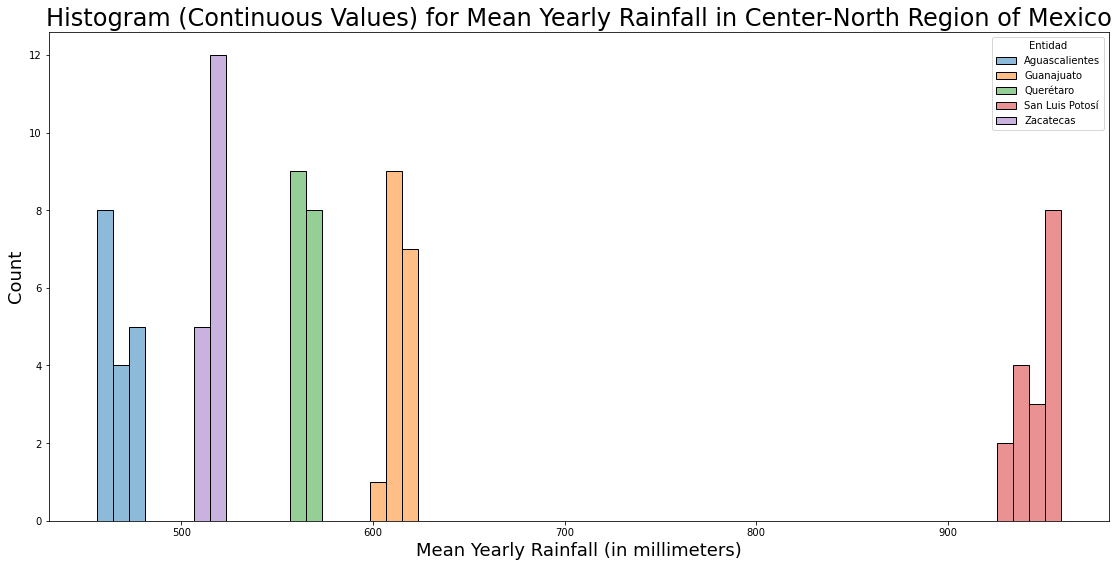

In [7]:
fig, ax = plt.subplots(figsize=(19,9))
plt.title('Histogram (Continuous Values) for Mean Yearly Rainfall in Center-North Region of Mexico', fontsize=24)
plt.xlabel('Mean Yearly Rainfall (in millimeters)', fontsize=18)
plt.ylabel('Count', fontsize=18)
sns.histplot(data=df.T, bins=60)

#### Histogram (As Discrete)

Text(0, 0.5, 'Count')

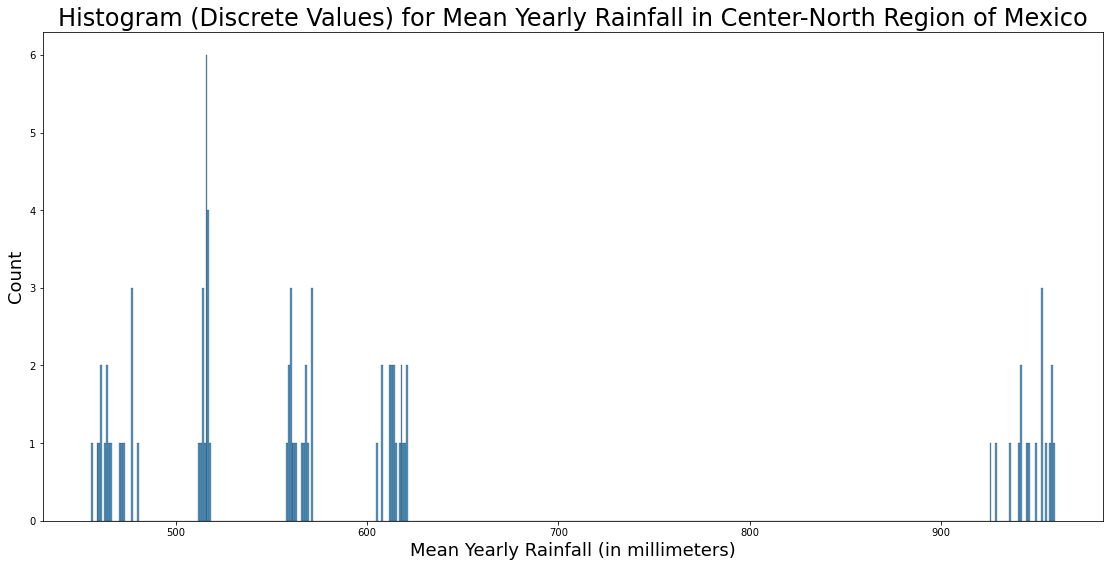

In [8]:
fig, ax = plt.subplots(figsize=(19,9))

sns.histplot(data_array, discrete=True)
plt.title('Histogram (Discrete Values) for Mean Yearly Rainfall in Center-North Region of Mexico', fontsize=24)
plt.xlabel('Mean Yearly Rainfall (in millimeters)', fontsize=18)
plt.ylabel('Count', fontsize=18)

Text(0, 0.5, 'Count')

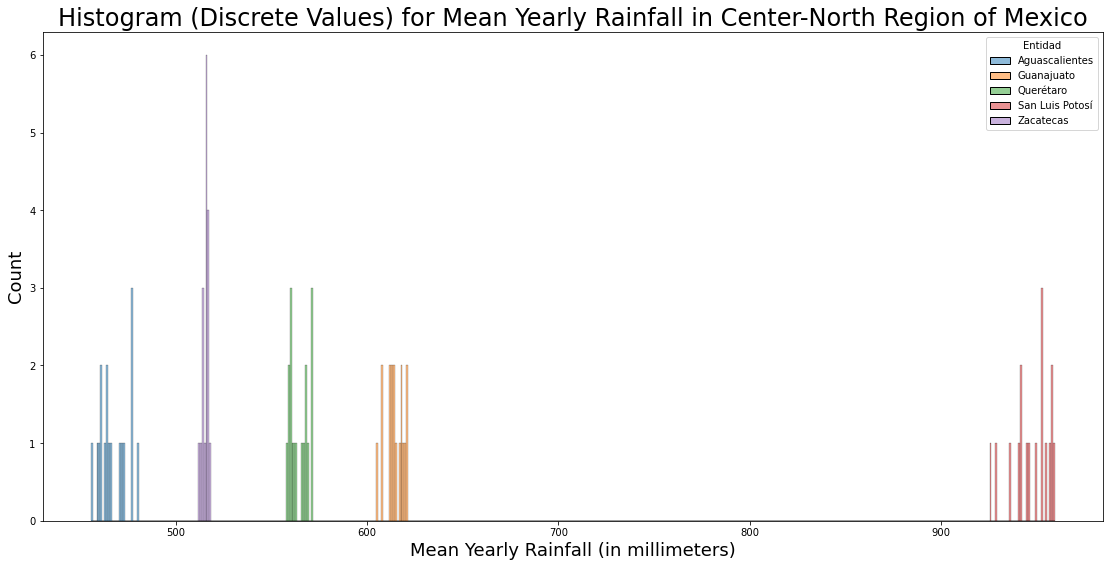

In [9]:
fig, ax = plt.subplots(figsize=(19,9))

sns.histplot(df.T, discrete=True)
plt.title('Histogram (Discrete Values) for Mean Yearly Rainfall in Center-North Region of Mexico', fontsize=24)
plt.xlabel('Mean Yearly Rainfall (in millimeters)', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Standarized Analysis

Now, the data is the mean yearly rainfall of the states, but these states vary considerably in their surface area. It would not be fair to compare states with a lot of surface area to those with little surface area, since the states with more surface area would get a lot more yearly rainfall for having more surface area.

Since we are interested in knowing which state is the driest, then we have to scale the mean yearly rainfall by the surface area (precisely, the area in kilometers^2 / 1000 km^2) so we can answer the question more precisely.

We use INEGI's data[^2]: to get the surface area of each state.

[^2]: https://cuentame.inegi.org.mx/monografias/default.aspx?tema=me

In [10]:
# We get area in kilometers^2 / (1000 km^2) for the following states:
# Aguascalientes, Guanajuato, Querétaro, San Luis Potosí, Zacatecas
area_km2_per_thousandkm =[5.616, 30.607, 11.691,  61.138, 75.275]

In [11]:
df_scaled = df.T/area_km2_per_thousandkm
df_scaled

Entidad,Aguascalientes,Guanajuato,Querétaro,San Luis Potosí,Zacatecas
2005,81.196581,19.766720,47.729022,15.473192,6.881435
2006,81.730769,19.864737,47.814558,15.407766,6.868150
2007,81.908832,19.864737,47.814558,15.407766,6.868150
2008,82.621083,20.028098,47.985630,15.587687,6.854865
2009,82.443020,20.028098,47.900094,15.587687,6.854865
2010,82.621083,20.093443,48.071166,15.685826,6.815012
2011,82.086895,19.995426,47.900094,15.669469,6.854865
2012,82.086895,19.995426,47.900094,15.669469,6.801727
2013,82.799145,20.060770,48.156702,15.653113,6.828296
2014,82.977208,20.060770,48.413309,15.620400,6.828296


<AxesSubplot:title={'center':'Histogram (Continuous Values) for Mean Yearly Rainfall per Squared kilometer\n in Center-North Region of Mexico'}, xlabel='Mean Yearly Rainfall (in millimeters)', ylabel='Count'>

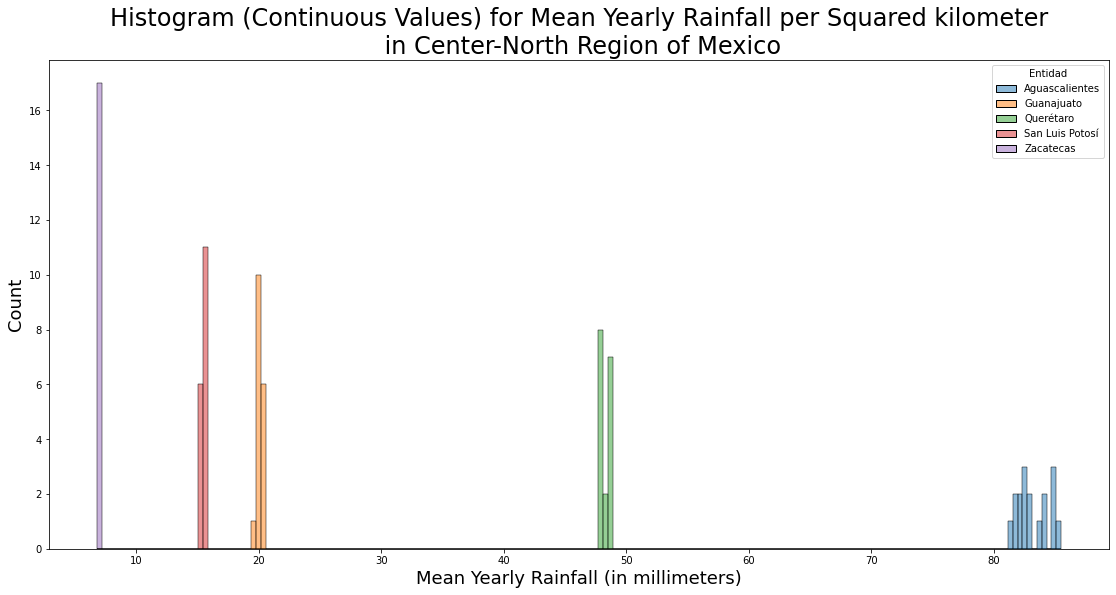

In [12]:
fig, ax = plt.subplots(figsize=(19,9))
plt.title('Histogram (Continuous Values) for Mean Yearly Rainfall per Squared kilometer\n in Center-North Region of Mexico', fontsize=24)
plt.xlabel('Mean Yearly Rainfall (in millimeters)', fontsize=18)
plt.ylabel('Count', fontsize=18)
sns.histplot(data=df_scaled, bins=200)

In [13]:
df_scaled.mean()

Entidad
Aguascalientes     83.228591
Guanajuato         20.079989
Querétaro          48.267395
San Luis Potosí    15.493397
Zacatecas           6.848614
dtype: float64

In [14]:
df_scaled.var()

Entidad
Aguascalientes     1.759934
Guanajuato         0.023893
Querétaro          0.166233
San Luis Potosí    0.027473
Zacatecas          0.000466
dtype: float64

We can conclude that Zacatecas is the driest state in the center-north region of Mexico. Also, Aguascalientes is the wettest state in the same region. We can also note that Aguascalientes mean yearly precipitation has more variance (1.76), and Zacatecas mean yearly precipitation has really low variance (0.0005), that means that Zacatecas gets almost the same mean yearly rainfall each year.